Purpose: Run the final principal component analyses (with and without `pyComBat`/SVA) for all datasets (as of May 12th).<br>
Author: Anna Pardo<br>
Date initiated: May 12, 2023

In [29]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from combat.pycombat import pycombat

In [30]:
# load TPM matrices
# TPM of all non-3' RNA-seq data from SRA
tpm_non3prime = pd.read_csv("../../data/TPM_LS_allsamp_05-May-2023.txt",sep="\t",header="infer")
tpm_non3prime.head()

,SRR8857799,SRR8857793,SRR15241108,SRR15241156,SRR8857749,SRR8857746,SRR15241170,SRR8857844,SRR9282931,SRR2106196,...,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248,GeneID
0,8.477884,1.349336,15.116249,13.781893,4.872421,32.421567,13.266106,10.918767,1.099232,5.291619,...,15.304726,9.054337,8.371502,6.884535,23.167063,10.531549,1.939595,3.661932,12.195099,Zm00001eb000010
1,102.011193,39.493900,0.808690,0.565147,13.808307,1.344191,1.035099,124.754873,45.137300,18.872878,...,3.608441,0.926072,3.874467,3.166363,3.762337,0.231235,0.000000,0.767166,2.757692,Zm00001eb000020
2,0.492838,0.000000,0.000000,0.000000,0.519128,2.733165,0.000000,1.152023,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.999909,0.000000,0.000000,0.076395,0.000000,Zm00001eb000050
3,28.480082,7.311609,35.563727,18.684174,7.134804,28.603220,22.302009,34.742011,2.411356,4.794730,...,12.338421,6.851312,10.411906,3.112488,19.269589,0.000000,1.254026,5.877407,14.959614,Zm00001eb000060
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360438,...,12.758565,1.048543,10.708364,2.937489,3.235341,2.842873,0.000000,12.544630,2.985126,Zm00001eb000070


In [31]:
# drop columns with duplicated samples from tpm_non3prime
tpm_non3prime.drop(["SRR21494916.1","SRR21494925.1"],axis=1,inplace=True)

In [32]:
# load TPM matrix of Brandon Webster's BRB-seq data
tpm_brb = pd.read_csv("../../data/Webster_TPM.txt",sep="\t",header="infer")
tpm_brb.head()

,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,PHB47xPHN82_LI_2_BRB3,PHB47xPHN82_LII_3_BRB4,PHB47xPHN82_LI_3_BRB6,PHB47xPHN82_LIII_1_BRB1,PHB47xPHN82_LIV_1_BRB2,PHB47xPHN82_LIII_2_BRB3,PHB47xPHN82_LIV_2_BRB4,PHB47xPHN82_LIV_3_BRB5,PHB47xPHN82_LIII_3_BRB5,GeneID
0,2.114086,1.660552,1.878490,2.620810,1.317652,3.080075,3.647894,1.290750,2.488043,1.577500,...,2.405001,2.075818,2.550406,3.430640,3.498847,2.108796,4.628517,1.828765,2.625361,Zm00001eb000010
1,3.659127,1.021915,0.500743,2.441291,1.390101,0.539431,1.479619,1.421682,1.813215,0.369439,...,1.470443,0.923670,1.421757,0.754487,1.271345,2.052833,2.214001,2.473819,0.950585,Zm00001eb000020
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251069,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Zm00001eb000050
3,11.195980,1.765126,2.114247,1.432727,0.000000,0.488056,0.000000,0.220506,2.863466,0.000000,...,0.000000,0.000000,0.000000,3.449083,0.000000,1.152822,0.948857,0.000000,0.000000,Zm00001eb000060
4,0.000000,0.000000,0.035727,0.042368,0.000000,0.000000,0.000000,0.052166,0.000000,0.023723,...,0.000000,0.031217,0.029450,0.356984,0.000000,0.000000,0.000000,0.000000,0.019075,Zm00001eb000070


In [33]:
# load TPM matrix of Jeremy Pardo's 3' RNA-seq data
tpm_3prime = pd.read_csv("../../data/TPM_counts.txt",sep="\t",header="infer")
tpm_3prime.head()

,CML69D1D,HP301D1C,Ky21D1C,IL14HD3C,MO18WD3D,B73D1C,IL14HD1C,Tx303D1D,CmL277D1C,Ky21D1D,...,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D,GeneID
0,2.253948,1.322243,1.611850,4.395168,2.614455,1.583103,4.356111,3.154567,2.864024,0.407748,...,1.923525,1.427602,9.580153,1.228100,2.966207,1.791556,4.286976,3.435711,3.498243,Zm00001eb000010
1,1.909826,0.390948,0.510434,1.661760,3.191106,0.334074,1.103666,0.152782,1.674700,0.000000,...,1.799671,0.000000,0.000000,1.925157,0.561768,0.176413,0.781353,0.379497,0.463832,Zm00001eb000020
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Zm00001eb000050
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Zm00001eb000060
4,0.171388,0.000000,0.000000,0.000000,1.404912,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.451827,0.000000,1.018369,0.000000,0.000000,0.000000,0.000000,1.660372,0.748587,Zm00001eb000070


In [6]:
len(tpm_3prime.index)

39091

In [7]:
len(tpm_brb.index)

39756

In [8]:
len(tpm_non3prime.index)

39092

In [34]:
# merge on gene ID, this should leave 39756 genes
tpm_all = tpm_brb.merge(tpm_3prime.merge(tpm_non3prime, how="inner",on="GeneID"),how="inner",on="GeneID")
tpm_all.set_index("GeneID",inplace=True)

In [10]:
tpm_all.head()

,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,SRR11933010,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,2.114086,1.660552,1.878490,2.620810,1.317652,3.080075,3.647894,1.290750,2.488043,1.577500,...,5.045644,15.304726,9.054337,8.371502,6.884535,23.167063,10.531549,1.939595,3.661932,12.195099
Zm00001eb000020,3.659127,1.021915,0.500743,2.441291,1.390101,0.539431,1.479619,1.421682,1.813215,0.369439,...,1.329592,3.608441,0.926072,3.874467,3.166363,3.762337,0.231235,0.000000,0.767166,2.757692
Zm00001eb000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251069,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.999909,0.000000,0.000000,0.076395,0.000000
Zm00001eb000060,11.195980,1.765126,2.114247,1.432727,0.000000,0.488056,0.000000,0.220506,2.863466,0.000000,...,2.380904,12.338421,6.851312,10.411906,3.112488,19.269589,0.000000,1.254026,5.877407,14.959614
Zm00001eb000070,0.000000,0.000000,0.035727,0.042368,0.000000,0.000000,0.000000,0.052166,0.000000,0.023723,...,11.307018,12.758565,1.048543,10.708364,2.937489,3.235341,2.842873,0.000000,12.544630,2.985126


In [11]:
len(tpm_all.index)

39004

In [35]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [36]:
# transpose TPM data
ttpm = tpm_all.transpose()
ttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
B73xMO17_HII_1_BRB1,2.114086,3.659127,0.0,11.195980,0.000000,8.487909,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HII_2_BRB3,1.660552,1.021915,0.0,1.765126,0.000000,5.350063,0.0,0.0,0.411018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HI_2_BRB4,1.878490,0.500743,0.0,2.114247,0.035727,5.126593,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HII_3_BRB4,2.620810,2.441291,0.0,1.432727,0.042368,5.845763,0.0,0.0,1.167661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HI_3_BRB6,1.317652,1.390101,0.0,0.000000,0.000000,3.246945,0.0,0.0,0.559104,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
B73xMO17_HII_1_BRB1,2.114086,3.659127,0.0,11.195980,0.000000,8.487909,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HII_2_BRB3,1.660552,1.021915,0.0,1.765126,0.000000,5.350063,0.0,0.0,0.411018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HI_2_BRB4,1.878490,0.500743,0.0,2.114247,0.035727,5.126593,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HII_3_BRB4,2.620810,2.441291,0.0,1.432727,0.042368,5.845763,0.0,0.0,1.167661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HI_3_BRB6,1.317652,1.390101,0.0,0.000000,0.000000,3.246945,0.0,0.0,0.559104,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# find how many low-variance genes were eliminated
len(ttpm.columns)-len(vttpm.columns)

6

In [38]:
# log-transform TPM
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# run PCA and generate dataframe with PCs
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(vttpm_log)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [18]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.28104128, 0.14540528])

In [19]:
## reset index (after running PCA)
vttpm_log.reset_index(inplace=True)
vttpm_log.rename(columns={"index":"Sample"},inplace=True)
vttpm_log.head()

GeneID,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Load metadata
md = pd.read_csv("../../data/srr_numbers_with_metadata_12-May-2023.csv",sep=",",header="infer")
md.head()

,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [21]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
vttpm_log_merged = vttpm_log.merge(md,how="inner")
vttpm_log_merged.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,...,V8,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
1,B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
2,B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
3,B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
4,B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN


In [22]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,vttpm_log_merged[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,-147.706628,111.886575,Brandon_Webster,B73XMO17,Control,35 days,148 lb/acre,V8,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
1,-137.678396,109.199521,Brandon_Webster,B73XMO17,Control,56 days,148 lb/acre,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
2,-145.265242,110.778214,Brandon_Webster,B73XMO17,Control,NaN,148 lb/acre,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
3,-137.354930,88.959091,Brandon_Webster,B73XMO17,Control,78 days,148 lb/acre,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
4,-125.058593,79.118422,Brandon_Webster,B73XMO17,Control,NaN,148 lb/acre,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN


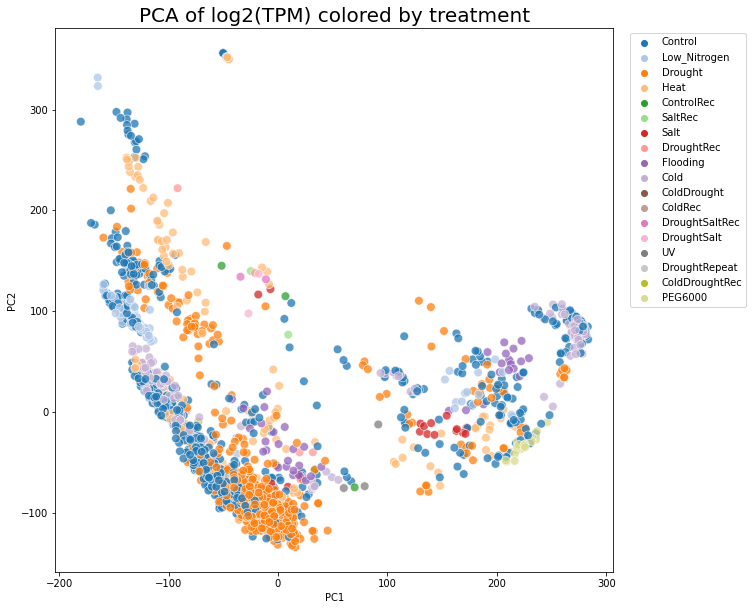

In [23]:
# plot the data: to start with, color by treatment
## note this is without pyComBat
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab20",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by treatment",fontsize=20)
plt.legend(bbox_to_anchor=(1.02,1))
plt.savefig("../../figures/PCA/15-May-2023_AllData_byTreatment.pdf",bbox_inches="tight")

In [24]:
plotdf["BioProject"].unique()[0]

'Brandon_Webster'

In [25]:
# I will attempt to plot two overlapping scatterplots with different colormaps to accommodate all 40 BioProjects
# generate a list containing half of the BioProjects

half_bioprojects = []
count = 0
while count < 20:
    half_bioprojects.append(plotdf["BioProject"].unique()[count])
    count += 1
half_bioprojects

['Brandon_Webster',
 'PRJNA906711',
 'PRJNA520822',
 'PRJNA747925',
 'PRJNA548548',
 'PRJNA290180',
 'PRJNA244661',
 'PRJNA436973',
 'PRJNA291919',
 'PRJNA378714',
 'PRJNA606824',
 'PRJNA420600',
 'PRJNA689935',
 'PRJNA759701',
 'PRJNA210356',
 'PRJNA304223',
 'PRJNA339768',
 'PRJNA172724',
 'PRJNA267717',
 'PRJNA587226']

In [26]:
# generate dataframes each containing half the BioProjects
plotdf1 = plotdf[plotdf["BioProject"].isin(half_bioprojects)]
plotdf2 = plotdf[~plotdf["BioProject"].isin(half_bioprojects)]

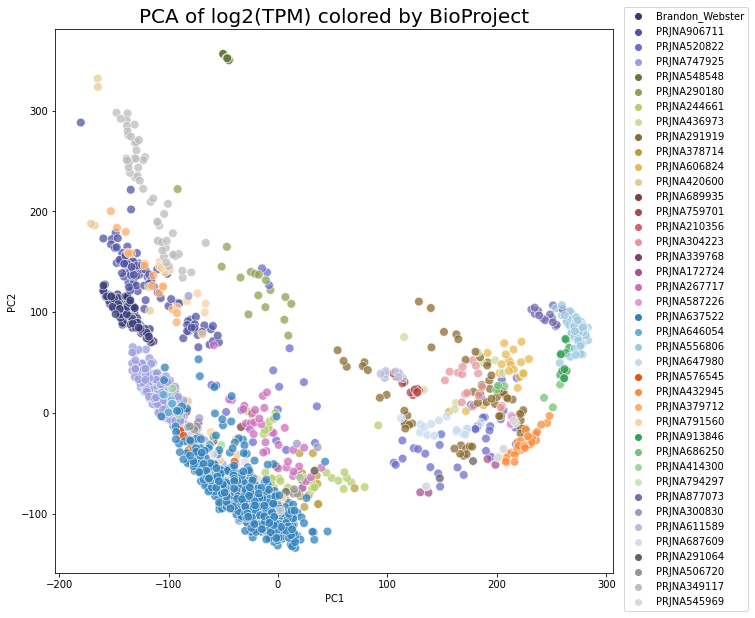

In [27]:
# plot data by BioProject
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by BioProject",fontsize=20)
plt.legend(bbox_to_anchor=(1.25,1.05))
plt.savefig("../../figures/PCA/15-May-2023_AllData_byBioProject.pdf",bbox_inches="tight")

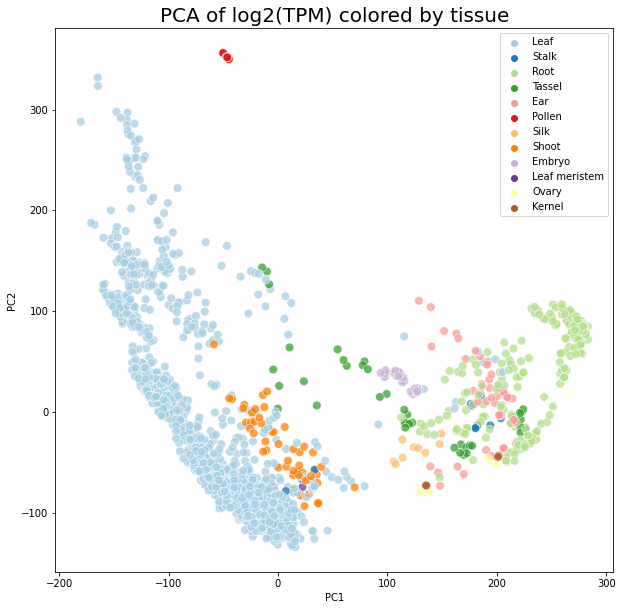

In [28]:
# plot data by tissue
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="Paired",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by tissue",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/15-May-2023_AllData_byTissue.pdf",bbox_inches="tight")

In [29]:
# set up for developmental stage similar to BioProject - there are 32 developmental stages, make a list of the first 20
dev20 = []
count = 0
while count < 20:
    dev20.append(plotdf["Developmental_stage"].unique()[count])
    count += 1
dev20

['V8',
 'VT',
 'R2',
 'V5',
 'V3',
 'V2/V3',
 'R1',
 'pollen maturation (stress at tetrad stage)',
 'V5/V6',
 '14 days old',
 'V6',
 'V12',
 'Seedling',
 'V14',
 'Germination',
 'Two weeks old',
 nan,
 'V18',
 '1 day after pollination',
 'V2']

In [30]:
# split the dataframes
plotdf1 = plotdf[plotdf["Developmental_stage"].isin(dev20)]
plotdf2 = plotdf[~plotdf["Developmental_stage"].isin(dev20)]

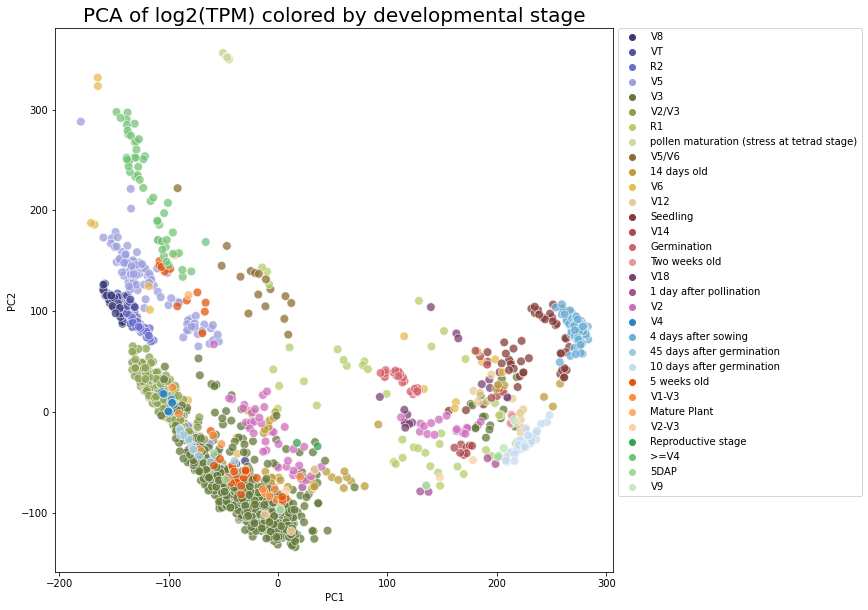

In [31]:
# plot by developmental stage
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["Developmental_stage"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["Developmental_stage"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by developmental stage",fontsize=20)
plt.legend(bbox_to_anchor=(1,1.01))
plt.savefig("../../figures/PCA/15-May-2023_AllData_byDevStage.pdf",bbox_inches="tight")

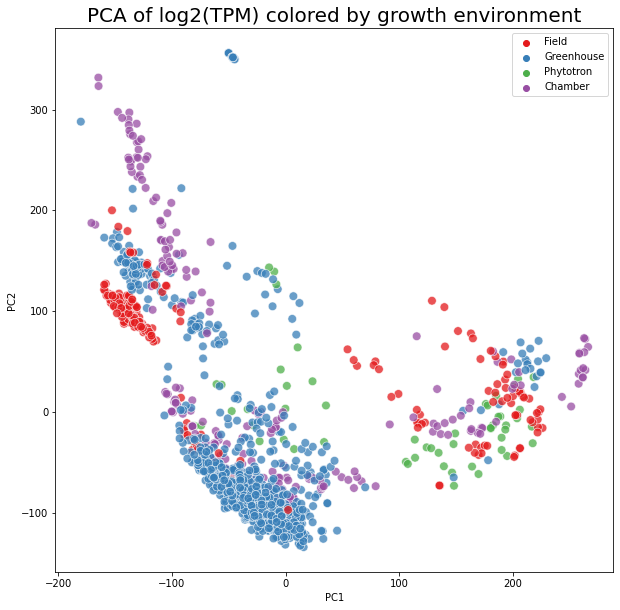

In [32]:
# plot by growth environment
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Growth Env."],palette="Set1",s=75,alpha=0.75)
plt.title("PCA of log2(TPM) colored by growth environment",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/15-May-2023_AllData_byGrowthEnv.pdf",bbox_inches="tight")

These plots clearly indicate that the data are clustering by BioProject as well as by tissue. I am going to next run `pyComBat` to attempt to remove batch effects from BioProject.

In [12]:
# returning to the beginning, generate the batch variable from the unified transposed TPM matrix
## first, data wrangling: reset the index and merge with the metadata
comtpm = vttpm_log.reset_index().rename(columns={"index":"Sample"})
comtpm.head()

GeneID,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# merge with metadata
mdcomtpm = comtpm.merge(md,how="inner",on="Sample")
mdcomtpm.set_index("Sample",inplace=True)
mdcomtpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
Sample,,,,,,,,,,,,,,,,,,,,,
B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,0.0,...,V8,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,0.0,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,0.0,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,0.0,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,0.0,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN


In [14]:
# generate a list of dataframes each with a single BioProject
dflist = []
for i in range(len(mdcomtpm["BioProject"].unique())):
    bp = mdcomtpm["BioProject"].unique()[i]
    dflist.append(mdcomtpm[mdcomtpm["BioProject"]==bp])
dflist[0].head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
Sample,,,,,,,,,,,,,,,,,,,,,
B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,0.0,...,V8,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,0.0,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,0.0,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,0.0,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,0.0,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN


In [15]:
# for each dataframe in dflist: remove the columns not beginning with Zm, then transpose the dataframe
dl2 = []
for df in dflist:
    filtered_columns = [col for col in df.columns if col.startswith("Zm")]
    df2 = df[filtered_columns]
    dl2.append(df2.transpose())

In [16]:
dl2[0].head()

Sample,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,PHB47xPHN82_LII_2_BRB3,PHB47xPHN82_LI_2_BRB3,PHB47xPHN82_LII_3_BRB4,PHB47xPHN82_LI_3_BRB6,PHB47xPHN82_LIII_1_BRB1,PHB47xPHN82_LIV_1_BRB2,PHB47xPHN82_LIII_2_BRB3,PHB47xPHN82_LIV_2_BRB4,PHB47xPHN82_LIV_3_BRB5,PHB47xPHN82_LIII_3_BRB5
Zm00001eb000010,1.638809,1.411726,1.525312,1.856313,1.212664,2.028596,2.216577,1.195820,1.802418,1.365973,...,1.642560,1.767655,1.620970,1.827984,2.147515,2.169555,1.636356,2.492755,1.500172,1.858125
Zm00001eb000020,2.220060,1.015722,0.585677,1.782950,1.257071,0.622397,1.310119,1.276010,1.492220,0.453585,...,0.637516,1.304770,0.943861,1.276054,0.811049,1.183547,1.610149,1.684370,1.796522,0.963907
Zm00001eb000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323162,0.000000,...,0.057539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001eb000060,3.608334,1.467345,1.638883,1.282574,0.000000,0.573429,0.000000,0.287479,1.949896,0.000000,...,0.762211,0.000000,0.000000,0.000000,2.153508,0.000000,1.106229,0.962629,0.000000,0.000000
Zm00001eb000070,0.000000,0.000000,0.050644,0.059865,0.000000,0.000000,0.000000,0.073362,0.000000,0.033825,...,0.039063,0.000000,0.044347,0.041874,0.440404,0.000000,0.000000,0.000000,0.000000,0.027260


In [17]:
# generate the batch variable
batch = []
for j in range(len(dl2)):
    batch.extend([j for _ in range(len(dl2[j].columns))])

In [18]:
# go back to vttpm_log and re-transpose it
vtpm_log = vttpm_log.transpose()
vtpm_log.head()

,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,SRR11933010,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,1.638809,1.411726,1.525312,1.856313,1.212664,2.028596,2.216577,1.195820,1.802418,1.365973,...,2.595896,4.027218,3.329746,3.228280,2.979026,4.594970,3.527514,1.555617,2.220928,3.721930
Zm00001eb000020,2.220060,1.015722,0.585677,1.782950,1.257071,0.622397,1.310119,1.276010,1.492220,0.453585,...,1.220077,2.204279,0.945662,2.285244,2.058789,2.251670,0.300106,0.000000,0.821438,1.909847
Zm00001eb000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323162,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.999934,0.000000,0.000000,0.106208,0.000000
Zm00001eb000060,3.608334,1.467345,1.638883,1.282574,0.000000,0.573429,0.000000,0.287479,1.949896,0.000000,...,1.757409,3.737516,2.972934,3.512468,2.040011,4.341245,0.000000,1.172504,2.781865,3.996354
Zm00001eb000070,0.000000,0.000000,0.050644,0.059865,0.000000,0.000000,0.000000,0.073362,0.000000,0.033825,...,3.621409,3.782258,1.034598,3.549468,1.977276,2.082478,1.942185,0.000000,3.759649,1.994625


In [19]:
# run pyComBat
corrected_tpm = pycombat(vtpm_log,batch)

Found 40 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/leviathan22/.local/lib/python3.8/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


In [20]:
corrected_tpm.head()

,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,SRR11933010,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,2.769565,2.334767,2.552252,3.186022,1.953621,3.515894,3.875824,1.921371,3.082829,2.247163,...,2.375784,3.964715,3.190441,3.077803,2.801102,4.594984,3.409986,1.220956,1.959527,3.625810
Zm00001eb000020,4.149382,2.315277,1.660353,3.483700,2.682831,1.716275,2.763618,2.711672,3.040942,1.459189,...,1.649246,2.913537,1.296736,3.017544,2.726642,2.974415,0.467465,0.081953,1.137160,2.535314
Zm00001eb000050,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.697377,0.263859,...,0.032187,0.032187,0.032187,0.032187,0.032187,1.353248,0.032187,0.032187,0.172503,0.032187
Zm00001eb000060,6.423797,3.766544,3.979446,3.537219,1.945372,2.657075,1.945372,2.302172,4.365454,1.945372,...,1.993777,3.699867,3.041091,3.505962,2.237272,4.220048,0.479568,1.489815,2.876463,3.922885
Zm00001eb000070,0.907244,0.907244,1.130091,1.170668,0.907244,0.907244,0.907244,1.230060,0.907244,1.056085,...,2.770631,2.886049,0.914455,2.719009,1.590877,1.666365,1.565698,0.172075,2.869826,1.603326


In [21]:
# save the pyComBat-corrected and variance thresholded TPM in case I need it in future
corrected_tpm.reset_index().rename(columns={"index":"GeneID"}).to_csv("../../data/logTPM_all_variance_thresholded_pyComBat_16-May-2023.txt",
                                                                      sep="\t",header=True,index=False)

In [2]:
corrected_tpm = pd.read_csv("../../data/logTPM_all_variance_thresholded_pyComBat_16-May-2023.txt",sep="\t",header="infer",index_col="GeneID")
corrected_tpm.head()

,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,SRR11933010,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,2.769565,2.334767,2.552252,3.186022,1.953621,3.515894,3.875824,1.921371,3.082829,2.247163,...,2.375784,3.964715,3.190441,3.077803,2.801102,4.594984,3.409986,1.220956,1.959527,3.625810
Zm00001eb000020,4.149382,2.315277,1.660353,3.483700,2.682831,1.716275,2.763618,2.711672,3.040942,1.459189,...,1.649246,2.913537,1.296736,3.017544,2.726642,2.974415,0.467465,0.081953,1.137160,2.535314
Zm00001eb000050,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.697377,0.263859,...,0.032187,0.032187,0.032187,0.032187,0.032187,1.353248,0.032187,0.032187,0.172503,0.032187
Zm00001eb000060,6.423797,3.766544,3.979446,3.537219,1.945372,2.657075,1.945372,2.302172,4.365454,1.945372,...,1.993777,3.699867,3.041091,3.505962,2.237272,4.220048,0.479568,1.489815,2.876463,3.922885
Zm00001eb000070,0.907244,0.907244,1.130091,1.170668,0.907244,0.907244,0.907244,1.230060,0.907244,1.056085,...,2.770631,2.886049,0.914455,2.719009,1.590877,1.666365,1.565698,0.172075,2.869826,1.603326


In [3]:
# transpose corrected tpm (actually log tpm) df
ct = corrected_tpm.transpose()
ct.head()

GeneID,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
B73xMO17_HII_1_BRB1,2.769565,4.149382,0.263859,6.423797,0.907244,3.285251,0.211369,0.154834,0.282880,0.313661,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
B73xMO17_HII_2_BRB3,2.334767,2.315277,0.263859,3.766544,0.907244,2.811829,0.211369,0.154834,0.543265,0.313661,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
B73xMO17_HI_2_BRB4,2.552252,1.660353,0.263859,3.979446,1.130091,2.769591,0.211369,0.154834,0.282880,0.313661,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
B73xMO17_HII_3_BRB4,3.186022,3.483700,0.263859,3.537219,1.170668,2.900447,0.211369,0.154834,0.867950,0.313661,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
B73xMO17_HI_3_BRB6,1.953621,2.682831,0.263859,1.945372,0.907244,2.337569,0.211369,0.154834,0.618738,0.313661,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098


In [4]:
# run PCA and generate dataframe with PCs
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(ct)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [5]:
# find the explained variance ratio
pca.explained_variance_ratio_

array([0.25923172, 0.146784  ])

In [6]:
# reset index (after running PCA)
ct.reset_index(inplace=True)
ct.rename(columns={"index":"Sample"},inplace=True)
ct.head()

GeneID,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,2.769565,4.149382,0.263859,6.423797,0.907244,3.285251,0.211369,0.154834,0.282880,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
1,B73xMO17_HII_2_BRB3,2.334767,2.315277,0.263859,3.766544,0.907244,2.811829,0.211369,0.154834,0.543265,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
2,B73xMO17_HI_2_BRB4,2.552252,1.660353,0.263859,3.979446,1.130091,2.769591,0.211369,0.154834,0.282880,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
3,B73xMO17_HII_3_BRB4,3.186022,3.483700,0.263859,3.537219,1.170668,2.900447,0.211369,0.154834,0.867950,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
4,B73xMO17_HI_3_BRB6,1.953621,2.682831,0.263859,1.945372,0.907244,2.337569,0.211369,0.154834,0.618738,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098


In [9]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
ctm = ct.merge(md,how="inner")
ctm.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,B73xMO17_HII_1_BRB1,2.769565,4.149382,0.263859,6.423797,0.907244,3.285251,0.211369,0.154834,0.282880,...,V8,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
1,B73xMO17_HII_2_BRB3,2.334767,2.315277,0.263859,3.766544,0.907244,2.811829,0.211369,0.154834,0.543265,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
2,B73xMO17_HI_2_BRB4,2.552252,1.660353,0.263859,3.979446,1.130091,2.769591,0.211369,0.154834,0.282880,...,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
3,B73xMO17_HII_3_BRB4,3.186022,3.483700,0.263859,3.537219,1.170668,2.900447,0.211369,0.154834,0.867950,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN
4,B73xMO17_HI_3_BRB6,1.953621,2.682831,0.263859,1.945372,0.907244,2.337569,0.211369,0.154834,0.618738,...,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN,NaN


In [10]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,ctm[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,-14.458673,16.040439,Brandon_Webster,B73XMO17,Control,35 days,148 lb/acre,V8,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
1,-0.947228,9.302009,Brandon_Webster,B73XMO17,Control,56 days,148 lb/acre,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
2,-9.680096,13.115066,Brandon_Webster,B73XMO17,Control,NaN,148 lb/acre,VT,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
3,-1.728575,-12.123909,Brandon_Webster,B73XMO17,Control,78 days,148 lb/acre,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN
4,11.387221,-26.182392,Brandon_Webster,B73XMO17,Control,NaN,148 lb/acre,R2,Leaf,NaN,NaN,NaN,NaN,NaN,Field,NaN


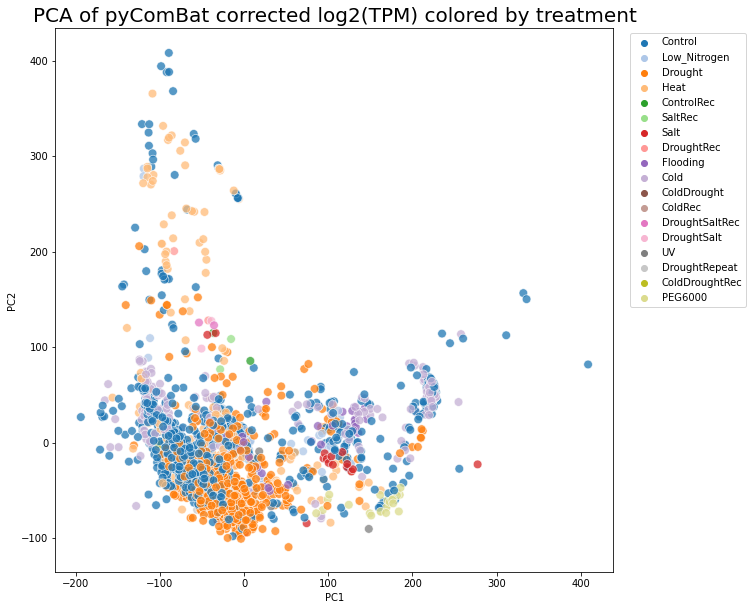

In [13]:
# plot the data: to start with, color by treatment
## note this is with correction via pyComBat
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab20",s=75,alpha=0.75)
plt.title("PCA of pyComBat corrected log2(TPM) colored by treatment",fontsize=20)
plt.legend(bbox_to_anchor=(1.02,1))
plt.savefig("../../figures/PCA/16-May-2023_AllData_byTreatment_pyComBat.pdf",bbox_inches="tight")

In [14]:
# plot two overlapping scatterplots with different colormaps to accommodate all 40 BioProjects
# generate a list containing half of the BioProjects

half_bioprojects = []
count = 0
while count < 20:
    half_bioprojects.append(plotdf["BioProject"].unique()[count])
    count += 1
half_bioprojects

['Brandon_Webster',
 'PRJNA906711',
 'PRJNA520822',
 'PRJNA747925',
 'PRJNA548548',
 'PRJNA290180',
 'PRJNA244661',
 'PRJNA436973',
 'PRJNA291919',
 'PRJNA378714',
 'PRJNA606824',
 'PRJNA420600',
 'PRJNA689935',
 'PRJNA759701',
 'PRJNA210356',
 'PRJNA304223',
 'PRJNA339768',
 'PRJNA172724',
 'PRJNA267717',
 'PRJNA587226']

In [15]:
# generate dataframes each containing half the BioProjects
plotdf1 = plotdf[plotdf["BioProject"].isin(half_bioprojects)]
plotdf2 = plotdf[~plotdf["BioProject"].isin(half_bioprojects)]

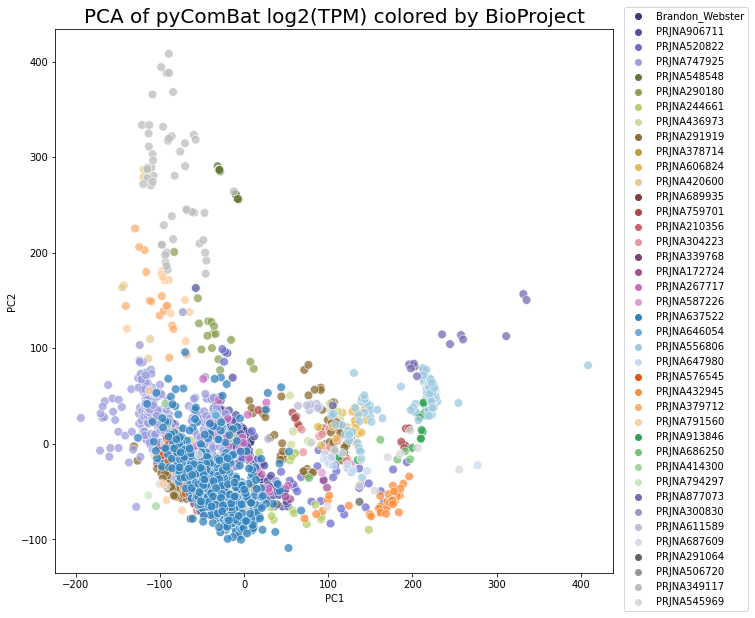

In [21]:
# plot data by BioProject
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of pyComBat log2(TPM) colored by BioProject",fontsize=20)
plt.legend(bbox_to_anchor=(1.25,1.05))
plt.savefig("../../figures/PCA/16-May-2023_AllData_byBioProject_pyComBat.pdf",bbox_inches="tight")

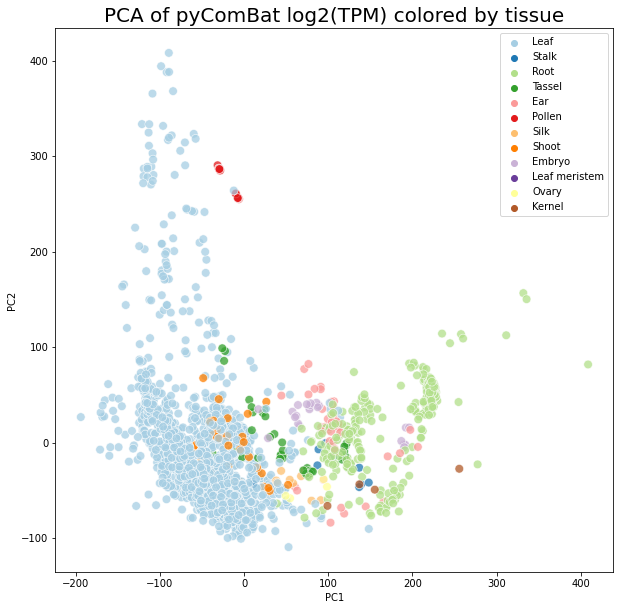

In [25]:
# plot data by tissue
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="Paired",s=75,alpha=0.75)
plt.title("PCA of pyComBat log2(TPM) colored by tissue",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/16-May-2023_AllData_byTissue_pyComBat.pdf",bbox_inches="tight")

In [23]:
# set up for developmental stage similar to BioProject - there are 32 developmental stages, make a list of the first 20
dev20 = []
count = 0
while count < 20:
    dev20.append(plotdf["Developmental_stage"].unique()[count])
    count += 1
dev20

['V8',
 'VT',
 'R2',
 'V5',
 'V3',
 'V2/V3',
 'R1',
 'pollen maturation (stress at tetrad stage)',
 'V5/V6',
 '14 days old',
 'V6',
 'V12',
 'Seedling',
 'V14',
 'Germination',
 'Two weeks old',
 nan,
 'V18',
 '1 day after pollination',
 'V2']

In [24]:
# split the dataframes
plotdf1 = plotdf[plotdf["Developmental_stage"].isin(dev20)]
plotdf2 = plotdf[~plotdf["Developmental_stage"].isin(dev20)]

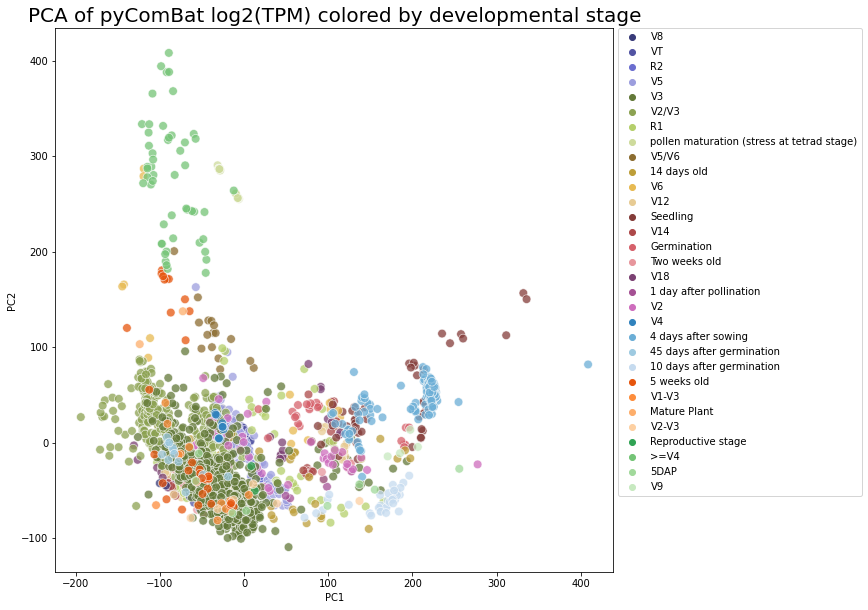

In [26]:
# plot by developmental stage
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["Developmental_stage"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["Developmental_stage"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of pyComBat log2(TPM) colored by developmental stage",fontsize=20)
plt.legend(bbox_to_anchor=(1,1.01))
plt.savefig("../../figures/PCA/16-May-2023_AllData_byDevStage_pyComBat.pdf",bbox_inches="tight")

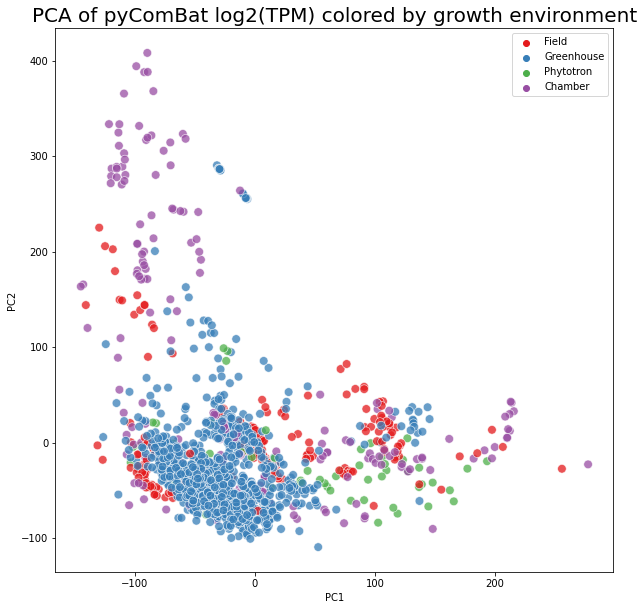

In [27]:
# plot by growth environment
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Growth Env."],palette="Set1",s=75,alpha=0.75)
plt.title("PCA of pyComBat log2(TPM) colored by growth environment",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("../../figures/PCA/16-May-2023_AllData_byGrowthEnv_pyComBat.pdf",bbox_inches="tight")

In [40]:
vttpm_log.reset_index(inplace=True)
vttpm_log.head()

GeneID,index,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
vttpm_log.rename(columns={"index":"Sample"},inplace=True)
vttpm_log.head()

GeneID,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# write vttpm_log to a file so I don't have to deal with it again
vttpm_log.to_csv("../../data/logTPM_allsamples_16-May-2023.txt",sep="\t",header=True,index=False)

In [1]:
import pandas as pd

In [3]:
vttpm_log = pd.read_csv("../../data/logTPM_allsamples_16-May-2023.txt",sep="\t",header="infer")

In [4]:
len(vttpm_log.columns)

38999